# [Python collections.Counter()用法](https://blog.csdn.net/qwe1257/article/details/83272340)

什么是collections
`collections`在python官方文档中的解释是**High-performance container datatypes**，直接的中文翻译解释**高性能容量数据类型**。
它总共包含五种数据类型：
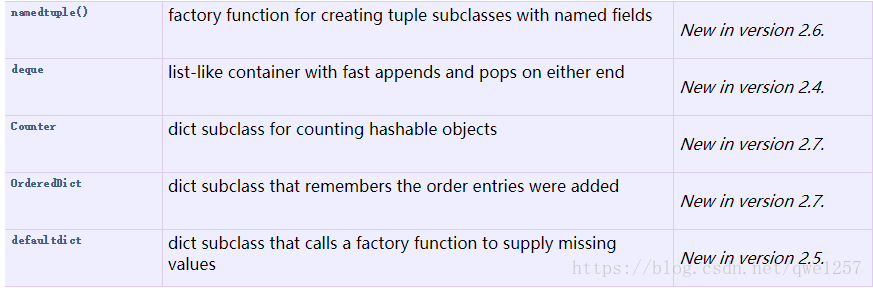
其中Counter中文意思是计数器，也就是我们常用于统计的一种数据类型，在使用Counter之后可以让我们的代码更加简单易读。

## Counter
我们先看一个简单的例子：

In [1]:
#统计词频
colors = ['red', 'blue', 'red', 'green', 'blue', 'blue']
result = {}
for color in colors:
    if result.get(color)==None:
        result[color]=1
    else:
        result[color]+=1
print (result)

{'red': 2, 'blue': 3, 'green': 1}


下面我们看用Counter怎么实现：

In [2]:
from collections import Counter
colors = ['red', 'blue', 'red', 'green', 'blue', 'blue']
c = Counter(colors)
print (dict(c))

{'red': 2, 'blue': 3, 'green': 1}


## Counter操作
可以创建一个空的Counter：

In [11]:
cnt = Counter()

之后在空的Counter上进行一些操作。

也可以创建的时候传进去一个迭代器（数组，字符串，字典等）：

In [9]:
c1 = Counter('gallahad')                 # 传进字符串
c2 = Counter({'red': 4, 'blue': 2})      # 传进字典
c3 = Counter(cats=4, dogs=8)             # 传进元组

print(c1)
print(c2)
print(c3)

Counter({'a': 3, 'l': 2, 'g': 1, 'h': 1, 'd': 1})
Counter({'red': 4, 'blue': 2})
Counter({'dogs': 8, 'cats': 4})


判断是否包含某元素，可以转化为dict然后通过dict判断，Counter也带有函数可以判断：

In [13]:
c = Counter(['eggs', 'ham'])
c['bacon']  # 不存在就返回0

0

删除元素：

In [17]:
c['sausage'] = 0  # counter entry with a zero count
del c['sausage'] 

获得所有元素：

In [18]:
c = Counter(a=4, b=2, c=0, d=-2)
list(c.elements())

['a', 'a', 'a', 'a', 'b', 'b']

查看最常见出现的k个元素：

In [19]:
Counter('abracadabra').most_common(3)

[('a', 5), ('b', 2), ('r', 2)]

Counter更新：

In [21]:
c = Counter(a=3, b=1)
d = Counter(a=1, b=2)

print(c + d)                       # 相加

print(c - d)                       # 相减，如果小于等于0，删去

print(c & d)                       # 求最小

print(c | d)                       # 求最大

Counter({'a': 4, 'b': 3})
Counter({'a': 2})
Counter({'a': 1, 'b': 1})
Counter({'a': 3, 'b': 2})


## 例子
例子：读文件统计词频并按照出现次数排序，文件是以空格隔开的单词的诸多句子：

In [22]:
from collections import Counter
lines = open("./data/input.txt","r").read().splitlines()
lines = [lines[i].split(" ") for i in range(len(lines))]
words = []
for line in lines:
    words.extend(line)
result = Counter(words)
print (result.most_common(10))

[('the', 9), ('in', 4), ('to', 4), ('Python,', 3), ('List,', 3), ('a', 3), ('', 3), ('Beginner', 2), ('out', 2), ('values', 2)]


当需要统计的文件比较大，使用read()一次读不完的情况：

In [23]:
from collections import Counter
result = Counter()
with open("./data/input.txt","r") as f:
    while True:
        lines = f.read(1024).splitlines()
        if lines==[]:
            break
        lines = [lines[i].split(" ") for i in range(len(lines))]
        words = []
        for line in lines:
            words.extend(line)
        tmp = Counter(words)
        result+=tmp

print (result.most_common(10))

[('the', 9), ('in', 4), ('to', 4), ('Python,', 3), ('List,', 3), ('a', 3), ('', 3), ('Beginner', 2), ('out', 2), ('values', 2)]
